## 4계절 포트폴리오

- Ray Dalio
- 레벨 : 초급
- 기대 연복리수익률 : 8~10% 정도
- 포함 자산 : 5개 ETF
- 미국 주식 SPY, 미국 중기국채 IEF, 미국 중기국채 TLT, 금 GLD, 원자재 DBC
- 매수 전략 : 자산을 SPY에 30%, IEF에 15%, TLT에 40%, GLD/DBC에 각각 7.5% 배분
- 매도 전략 : 연 1회 리밸런싱

In [1]:
import FinanceDataReader as fdr
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime, timedelta, date
import numpy as np
# pandas 표기 설정
pd.options.display.float_format = '{:.4f}'.format # 소수점 4자리까지 표기
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

### 팩터 불러오기

In [2]:
# 기간 설정
# 2007년 6월 1일 부터 모든 팩터 데이터 존재
start_date = datetime(1970, 1, 2)
end_date = datetime(2022, 12, 31)

In [3]:
# 종목의 종가 수집 함수
def get_price_data(stocks, start_date, end_date):
    df_price = pd.DataFrame(columns=stocks)
    for s in stocks:
        df_price[s] = pdr.DataReader(s, 'yahoo', start_date, end_date)['Close']
    
    return df_price

In [4]:
# 종목 설정
stocks = ['SPY', 'IEF', 'TLT', 'GLD', 'DBC']

In [5]:
df = get_price_data(stocks, start_date, end_date)
df = df.dropna()
df

,SPY,IEF,TLT,GLD,DBC
Date,,,,,
2006-02-06,126.6000,82.9300,91.0300,56.7200,24.2000
2006-02-07,125.4800,82.8300,90.6000,54.6000,23.5000
2006-02-08,126.6200,82.7800,90.3900,54.8300,23.4000
2006-02-09,126.4100,82.8600,90.8000,56.1800,23.6200
2006-02-10,126.6400,82.6200,90.3000,54.7900,23.1900
...,...,...,...,...,...
2022-05-31,412.9300,103.3200,116.5600,171.1400,28.8000
2022-06-01,409.5900,102.6100,116.2200,172.2300,28.9400
2022-06-02,417.3900,102.7600,116.2800,174.3500,29.6000


### 수익률, CAGR 및 MDD 구하기

In [6]:
# 초기자산에 대한 리밸런싱(1년) 수익 구하기
money = 10000
df['Profit'] = money # 초기 자산
df['S_Profit'] = money * 0.3
df['I_Profit'] = money * 0.15
df['T_Profit'] = money * 0.4
df['G_Profit'] = money * 0.075
df['D_Profit'] = money * 0.075

for i in range(1, len(df)):
    df['S_Profit'][i] = df['S_Profit'][i-1] * (df['SPY'][i] / df['SPY'][i-1])
    df['I_Profit'][i] = df['I_Profit'][i-1] * (df['IEF'][i] / df['IEF'][i-1])
    df['T_Profit'][i] = df['T_Profit'][i-1] * (df['TLT'][i] / df['TLT'][i-1])
    df['G_Profit'][i] = df['G_Profit'][i-1] * (df['GLD'][i] / df['GLD'][i-1])
    df['D_Profit'][i] = df['D_Profit'][i-1] * (df['DBC'][i] / df['DBC'][i-1])
    df['Profit'][i] = df['S_Profit'][i] + df['I_Profit'][i] + df['T_Profit'][i] + df['G_Profit'][i] + df['D_Profit'][i]
    
    if str(df.index[i].year) != str(df.index[i-1].year): # 1년 주기 리밸런싱
        money = df['Profit'][i]
        df['S_Profit'][i] = money * 0.3
        df['I_Profit'][i] = money * 0.15
        df['T_Profit'][i] = money * 0.4
        df['G_Profit'][i] = money * 0.075
        df['D_Profit'][i] = money * 0.075
        
df

,SPY,IEF,TLT,GLD,DBC,Profit,S_Profit,I_Profit,T_Profit,G_Profit,D_Profit
Date,,,,,,,,,,,
2006-02-06,126.6000,82.9300,91.0300,56.7200,24.2000,10000,3000.0000,1500.0000,4000.0000,750.0000,750.0000
2006-02-07,125.4800,82.8300,90.6000,54.6000,23.5000,9903,2973.4598,1498.1913,3981.1051,721.9675,728.3058
2006-02-08,126.6200,82.7800,90.3900,54.8300,23.4000,9919,3000.4740,1497.2868,3971.8774,725.0088,725.2066
2006-02-09,126.4100,82.8600,90.8000,56.1800,23.6200,9959,2995.4978,1498.7339,3989.8936,742.8596,732.0248
2006-02-10,126.6400,82.6200,90.3000,54.7900,23.1900,9906,3000.9479,1494.3929,3967.9229,724.4799,718.6983
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,103.3200,116.5600,171.1400,28.8000,20683,5971.0658,3132.2474,7439.8072,1755.7786,2384.2837
2022-06-01,409.5900,102.6100,116.2200,172.2300,28.9400,20614,5922.7687,3110.7231,7418.1059,1766.9613,2395.8740
2022-06-02,417.3900,102.7600,116.2800,174.3500,29.6000,20811,6035.5588,3115.2705,7421.9354,1788.7111,2450.5139


In [7]:
df['Profit_P'] = df['Profit'].pct_change() # 수익률
df['Profit_PA'] = (1+df['Profit_P']).cumprod()-1 # 누적 수익률
df['Profit_LP'] = np.log(df['Profit_P']+1) # log 수익률
df['Profit_LPA'] = df['Profit_LP'].cumsum() # log 수익률

df[['Profit_P', 'Profit_PA', 'Profit_LP', 'Profit_LPA']] *= 100
df

,SPY,IEF,TLT,GLD,DBC,Profit,S_Profit,I_Profit,T_Profit,G_Profit,D_Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA
Date,,,,,,,,,,,,,,,
2006-02-06,126.6000,82.9300,91.0300,56.7200,24.2000,10000,3000.0000,1500.0000,4000.0000,750.0000,750.0000,NaN,NaN,NaN,NaN
2006-02-07,125.4800,82.8300,90.6000,54.6000,23.5000,9903,2973.4598,1498.1913,3981.1051,721.9675,728.3058,-0.9700,-0.9700,-0.9747,-0.9747
2006-02-08,126.6200,82.7800,90.3900,54.8300,23.4000,9919,3000.4740,1497.2868,3971.8774,725.0088,725.2066,0.1616,-0.8100,0.1614,-0.8133
2006-02-09,126.4100,82.8600,90.8000,56.1800,23.6200,9959,2995.4978,1498.7339,3989.8936,742.8596,732.0248,0.4033,-0.4100,0.4025,-0.4108
2006-02-10,126.6400,82.6200,90.3000,54.7900,23.1900,9906,3000.9479,1494.3929,3967.9229,724.4799,718.6983,-0.5322,-0.9400,-0.5336,-0.9444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,103.3200,116.5600,171.1400,28.8000,20683,5971.0658,3132.2474,7439.8072,1755.7786,2384.2837,-1.2462,106.8300,-1.2540,72.6727
2022-06-01,409.5900,102.6100,116.2200,172.2300,28.9400,20614,5922.7687,3110.7231,7418.1059,1766.9613,2395.8740,-0.3336,106.1400,-0.3342,72.3385
2022-06-02,417.3900,102.7600,116.2800,174.3500,29.6000,20811,6035.5588,3115.2705,7421.9354,1788.7111,2450.5139,0.9557,108.1100,0.9511,73.2897


In [8]:
# 복리수익률 계산 함수
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100

In [9]:
df['CAGR'] = np.nan

fprice = df['Profit'][0]
df['CAGR'][0] = 0
idx = 0
years = 1
for row in range(1, len(df)):
    if str(df.index[row].year) != str(df.index[row-1].year):
        df['CAGR'][row] = CAGR(fprice, df['Profit'][row], years)
        idx = i
        years += 1
    else:
        df['CAGR'][row] = df['CAGR'][row-1]
df

,SPY,IEF,TLT,GLD,DBC,Profit,S_Profit,I_Profit,T_Profit,G_Profit,D_Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA,CAGR
Date,,,,,,,,,,,,,,,,
2006-02-06,126.6000,82.9300,91.0300,56.7200,24.2000,10000,3000.0000,1500.0000,4000.0000,750.0000,750.0000,NaN,NaN,NaN,NaN,0.0000
2006-02-07,125.4800,82.8300,90.6000,54.6000,23.5000,9903,2973.4598,1498.1913,3981.1051,721.9675,728.3058,-0.9700,-0.9700,-0.9747,-0.9747,0.0000
2006-02-08,126.6200,82.7800,90.3900,54.8300,23.4000,9919,3000.4740,1497.2868,3971.8774,725.0088,725.2066,0.1616,-0.8100,0.1614,-0.8133,0.0000
2006-02-09,126.4100,82.8600,90.8000,56.1800,23.6200,9959,2995.4978,1498.7339,3989.8936,742.8596,732.0248,0.4033,-0.4100,0.4025,-0.4108,0.0000
2006-02-10,126.6400,82.6200,90.3000,54.7900,23.1900,9906,3000.9479,1494.3929,3967.9229,724.4799,718.6983,-0.5322,-0.9400,-0.5336,-0.9444,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,103.3200,116.5600,171.1400,28.8000,20683,5971.0658,3132.2474,7439.8072,1755.7786,2384.2837,-1.2462,106.8300,-1.2540,72.6727,5.3510
2022-06-01,409.5900,102.6100,116.2200,172.2300,28.9400,20614,5922.7687,3110.7231,7418.1059,1766.9613,2395.8740,-0.3336,106.1400,-0.3342,72.3385,5.3510
2022-06-02,417.3900,102.7600,116.2800,174.3500,29.6000,20811,6035.5588,3115.2705,7421.9354,1788.7111,2450.5139,0.9557,108.1100,0.9511,73.2897,5.3510


In [10]:
# MDD 계산
window = 252
Roll_Max = df['Profit'].rolling(window, min_periods=1).max()
Daily_Drawdown = df['Profit']/ Roll_Max -1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
df['DD'] = Daily_Drawdown * 100
df['MDD'] = Max_Daily_Drawdown * 100

In [11]:
df = df[['SPY', 'IEF', 'TLT', 'GLD', 'DBC', 'Profit', 'Profit_P', 'Profit_PA', 'Profit_LP', 'Profit_LPA', 'CAGR', 'DD', 'MDD']]
print(f"포트폴리오 최대 MDD: {df['MDD'].min():.2f}%")
df

포트폴리오 최대 MDD: -16.42%


,SPY,IEF,TLT,GLD,DBC,Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA,CAGR,DD,MDD
Date,,,,,,,,,,,,,
2006-02-06,126.6000,82.9300,91.0300,56.7200,24.2000,10000,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
2006-02-07,125.4800,82.8300,90.6000,54.6000,23.5000,9903,-0.9700,-0.9700,-0.9747,-0.9747,0.0000,-0.9700,-0.9700
2006-02-08,126.6200,82.7800,90.3900,54.8300,23.4000,9919,0.1616,-0.8100,0.1614,-0.8133,0.0000,-0.8100,-0.9700
2006-02-09,126.4100,82.8600,90.8000,56.1800,23.6200,9959,0.4033,-0.4100,0.4025,-0.4108,0.0000,-0.4100,-0.9700
2006-02-10,126.6400,82.6200,90.3000,54.7900,23.1900,9906,-0.5322,-0.9400,-0.5336,-0.9444,0.0000,-0.9400,-0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,103.3200,116.5600,171.1400,28.8000,20683,-1.2462,106.8300,-1.2540,72.6727,5.3510,-11.4256,-13.6054
2022-06-01,409.5900,102.6100,116.2200,172.2300,28.9400,20614,-0.3336,106.1400,-0.3342,72.3385,5.3510,-11.7211,-13.6054
2022-06-02,417.3900,102.7600,116.2800,174.3500,29.6000,20811,0.9557,108.1100,0.9511,73.2897,5.3510,-10.8775,-13.6054


### 데이터 시각화

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Date'>

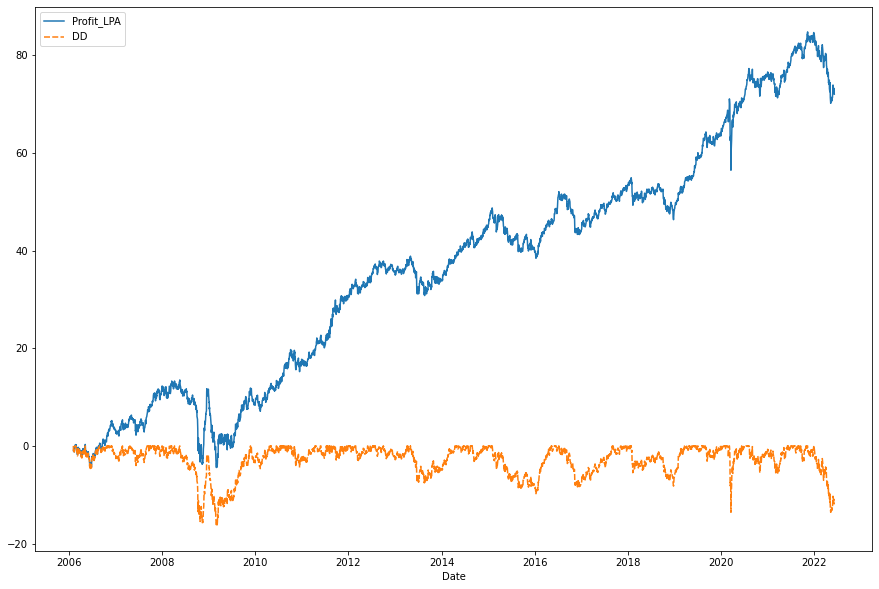

In [13]:
plt.figure(figsize=(15, 10))

sns.lineplot(data=df[['Profit_LPA', 'DD']])

<AxesSubplot:xlabel='Date'>

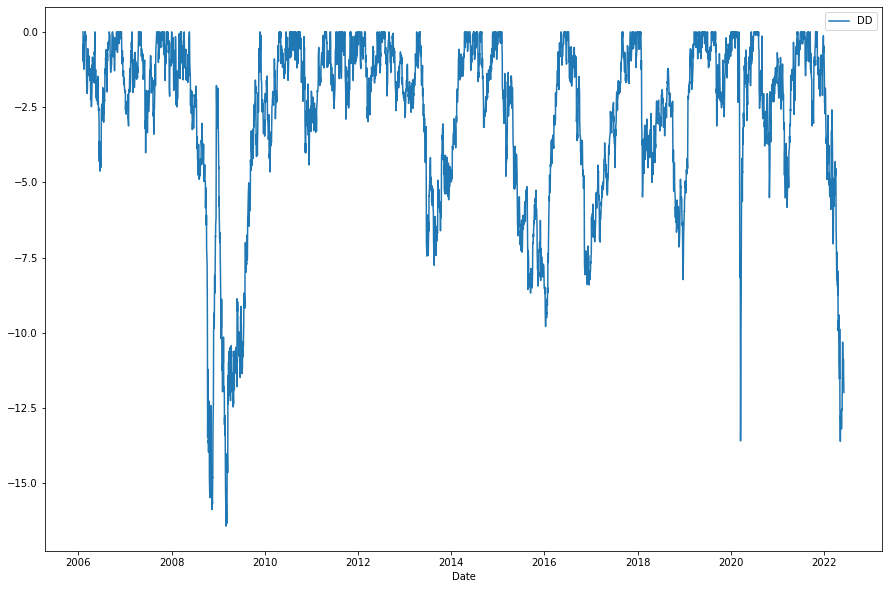

In [14]:
plt.figure(figsize=(15, 10))

sns.lineplot(data=df[['DD']])

## Historical Market Stress Periods 기능 Python Coding

In [15]:
stress_period = pd.DataFrame([['Oil Crisis', '1973-10-01', '1974-03-31'],
                             ['Black Monday Period', '1987-09-01', '1987-11-30'],
                             ['Asian Crisis', '1997-07-01', '1998-01-31'],
                             ['Russian Debt Default', '1998-07-01', '1998-01-31'],
                             ['Dotcom Crash', '2000-03-01', '2002-10-31'],
                             ['Subprime Crisis', '2007-11-01', '2009-03-31'],
                             ['COVID-19 Start', '2020-01-01', '2022-03-01']], 
                             columns=['Stress Period', 'Start', 'End'])
stress_period

,Stress Period,Start,End
0,Oil Crisis,1973-10-01,1974-03-31
1,Black Monday Period,1987-09-01,1987-11-30
2,Asian Crisis,1997-07-01,1998-01-31
3,Russian Debt Default,1998-07-01,1998-01-31
4,Dotcom Crash,2000-03-01,2002-10-31
5,Subprime Crisis,2007-11-01,2009-03-31
6,COVID-19 Start,2020-01-01,2022-03-01


In [16]:
stress_period['DD'] = np.nan
for i in range(len(stress_period)):
    stress_period['DD'][i] = df['DD'].loc[stress_period['Start'][i]:stress_period['End'][i]].min()
    stress_period['Start'][i] = str(stress_period['Start'][i])[:7] # '%Y-%m'
    stress_period['End'][i] = str(stress_period['End'][i])[:7]
stress_period = stress_period.dropna() # 결측치 제거
stress_period = stress_period.reset_index(drop=True)
stress_period

,Stress Period,Start,End,DD
0,Subprime Crisis,2007-11,2009-03,-16.4235
1,COVID-19 Start,2020-01,2022-03,-13.5924


## Drawdowns for Portfolio 1 기능 Python Coding

In [17]:
day0 = []
for i in range(len(df)):
    if df['DD'][i] == 0:
        day0.append(df.index[i])
day0

[Timestamp('2006-02-06 00:00:00'),
 Timestamp('2006-02-22 00:00:00'),
 Timestamp('2006-02-24 00:00:00'),
 Timestamp('2006-05-10 00:00:00'),
 Timestamp('2006-08-30 00:00:00'),
 Timestamp('2006-08-31 00:00:00'),
 Timestamp('2006-09-25 00:00:00'),
 Timestamp('2006-09-26 00:00:00'),
 Timestamp('2006-09-27 00:00:00'),
 Timestamp('2006-10-25 00:00:00'),
 Timestamp('2006-10-26 00:00:00'),
 Timestamp('2006-10-27 00:00:00'),
 Timestamp('2006-10-30 00:00:00'),
 Timestamp('2006-10-31 00:00:00'),
 Timestamp('2006-11-01 00:00:00'),
 Timestamp('2006-11-07 00:00:00'),
 Timestamp('2006-11-08 00:00:00'),
 Timestamp('2006-11-09 00:00:00'),
 Timestamp('2006-11-10 00:00:00'),
 Timestamp('2006-11-14 00:00:00'),
 Timestamp('2006-11-17 00:00:00'),
 Timestamp('2006-11-20 00:00:00'),
 Timestamp('2006-11-21 00:00:00'),
 Timestamp('2006-11-22 00:00:00'),
 Timestamp('2006-11-24 00:00:00'),
 Timestamp('2006-11-28 00:00:00'),
 Timestamp('2006-11-29 00:00:00'),
 Timestamp('2006-11-30 00:00:00'),
 Timestamp('2006-12-

In [18]:
Portfolio = pd.DataFrame(
    columns=['Start', 'End', 'Length(day)', 'Recovery By', 'Recovery Time(day)', 'Underwater Period(day)', 'Drawdown'])

for i in range(1, len(day0)):
    Start = day0[i-1] # Drawdown 시작일
    pcost = df['Profit'].loc[Start] # Drawdown 시작일 자산
    UnderWaterEndDay = day0[i] # UnderWaterEnd Day

    dt = df.loc[Start:UnderWaterEndDay] # Drawdown 기간 dataframe
    
    t = df.loc[Start:]
    for j in range(1, len(t)):
        if t['Profit'][j] >= pcost: # Recovery day
            RecoveryBy = t.index[j]
            break
    
    UnderWaterPeriod = UnderWaterEndDay - Start # UnderWater Period
    
    dd = dt['DD'].min() # Drawdown
    if dd == 0.0:
        continue
    End = dt['DD'].idxmin() # Drawdown Date
    Length = End - Start # Drawdown days
    RecoveryTime = RecoveryBy - End # 회복하는데 걸린 시간
    
    temp = [str(Start)[:10], str(End)[:10], Length.days, str(RecoveryBy)[:10], RecoveryTime.days, UnderWaterPeriod.days, dd]
    Portfolio = Portfolio.append(pd.Series(temp, index=Portfolio.columns), ignore_index=True)

In [19]:
Portfolio = Portfolio.sort_values(by=['Drawdown'])
Portfolio = Portfolio.reset_index(drop=True)
Portfolio.index = Portfolio.index + 1
Portfolio.index.name = 'Rank'

In [20]:
Portfolio.head(10)

,Start,End,Length(day),Recovery By,Recovery Time(day),Underwater Period(day),Drawdown
Rank,,,,,,,
1,2008-05-20,2009-03-03,287,2010-07-15,499,554,-16.4235
2,2020-03-06,2020-03-18,12,2020-06-10,84,96,-13.5924
3,2015-02-02,2016-01-11,343,2016-06-28,169,463,-9.7906
4,2016-07-08,2016-12-16,161,2017-11-06,325,424,-8.4115
5,2018-01-26,2018-12-24,332,2019-03-29,95,418,-8.2328
6,2013-05-02,2013-08-21,111,2014-04-16,238,349,-7.7554
7,2020-08-06,2021-03-18,224,2021-06-04,78,302,-5.8302
8,2009-11-25,2010-02-10,77,2010-04-23,72,149,-4.6541
9,2006-05-10,2006-06-19,40,2006-08-30,72,112,-4.6261
